recognize document

In [7]:
!pip install pdf2image
!pip install tesserocr




You should consider upgrading via the '/Users/standard/Lexicanium/venv/bin/python -m pip install --upgrade pip' command.
  Using cached tesserocr-2.5.2.tar.gz (57 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for tesserocr: filename=tesserocr-2.5.2-cp38-cp38-macosx_10_14_arm64.whl size=291557 sha256=b55b47191740760ee2598b712b4b5614d71dd9f742294780f20d6fc7312e0e33
  Stored in directory: /Users/standard/Library/Caches/pip/wheels/37/dc/0b/36772b98dae0f858676602cb16ed393eb3353a4abe7d4bb146
Successfully built tesserocr
You should consider upgrading via the '/Users/standard/Lexicanium/venv/bin/python -m pip install --upgrade pip' command.


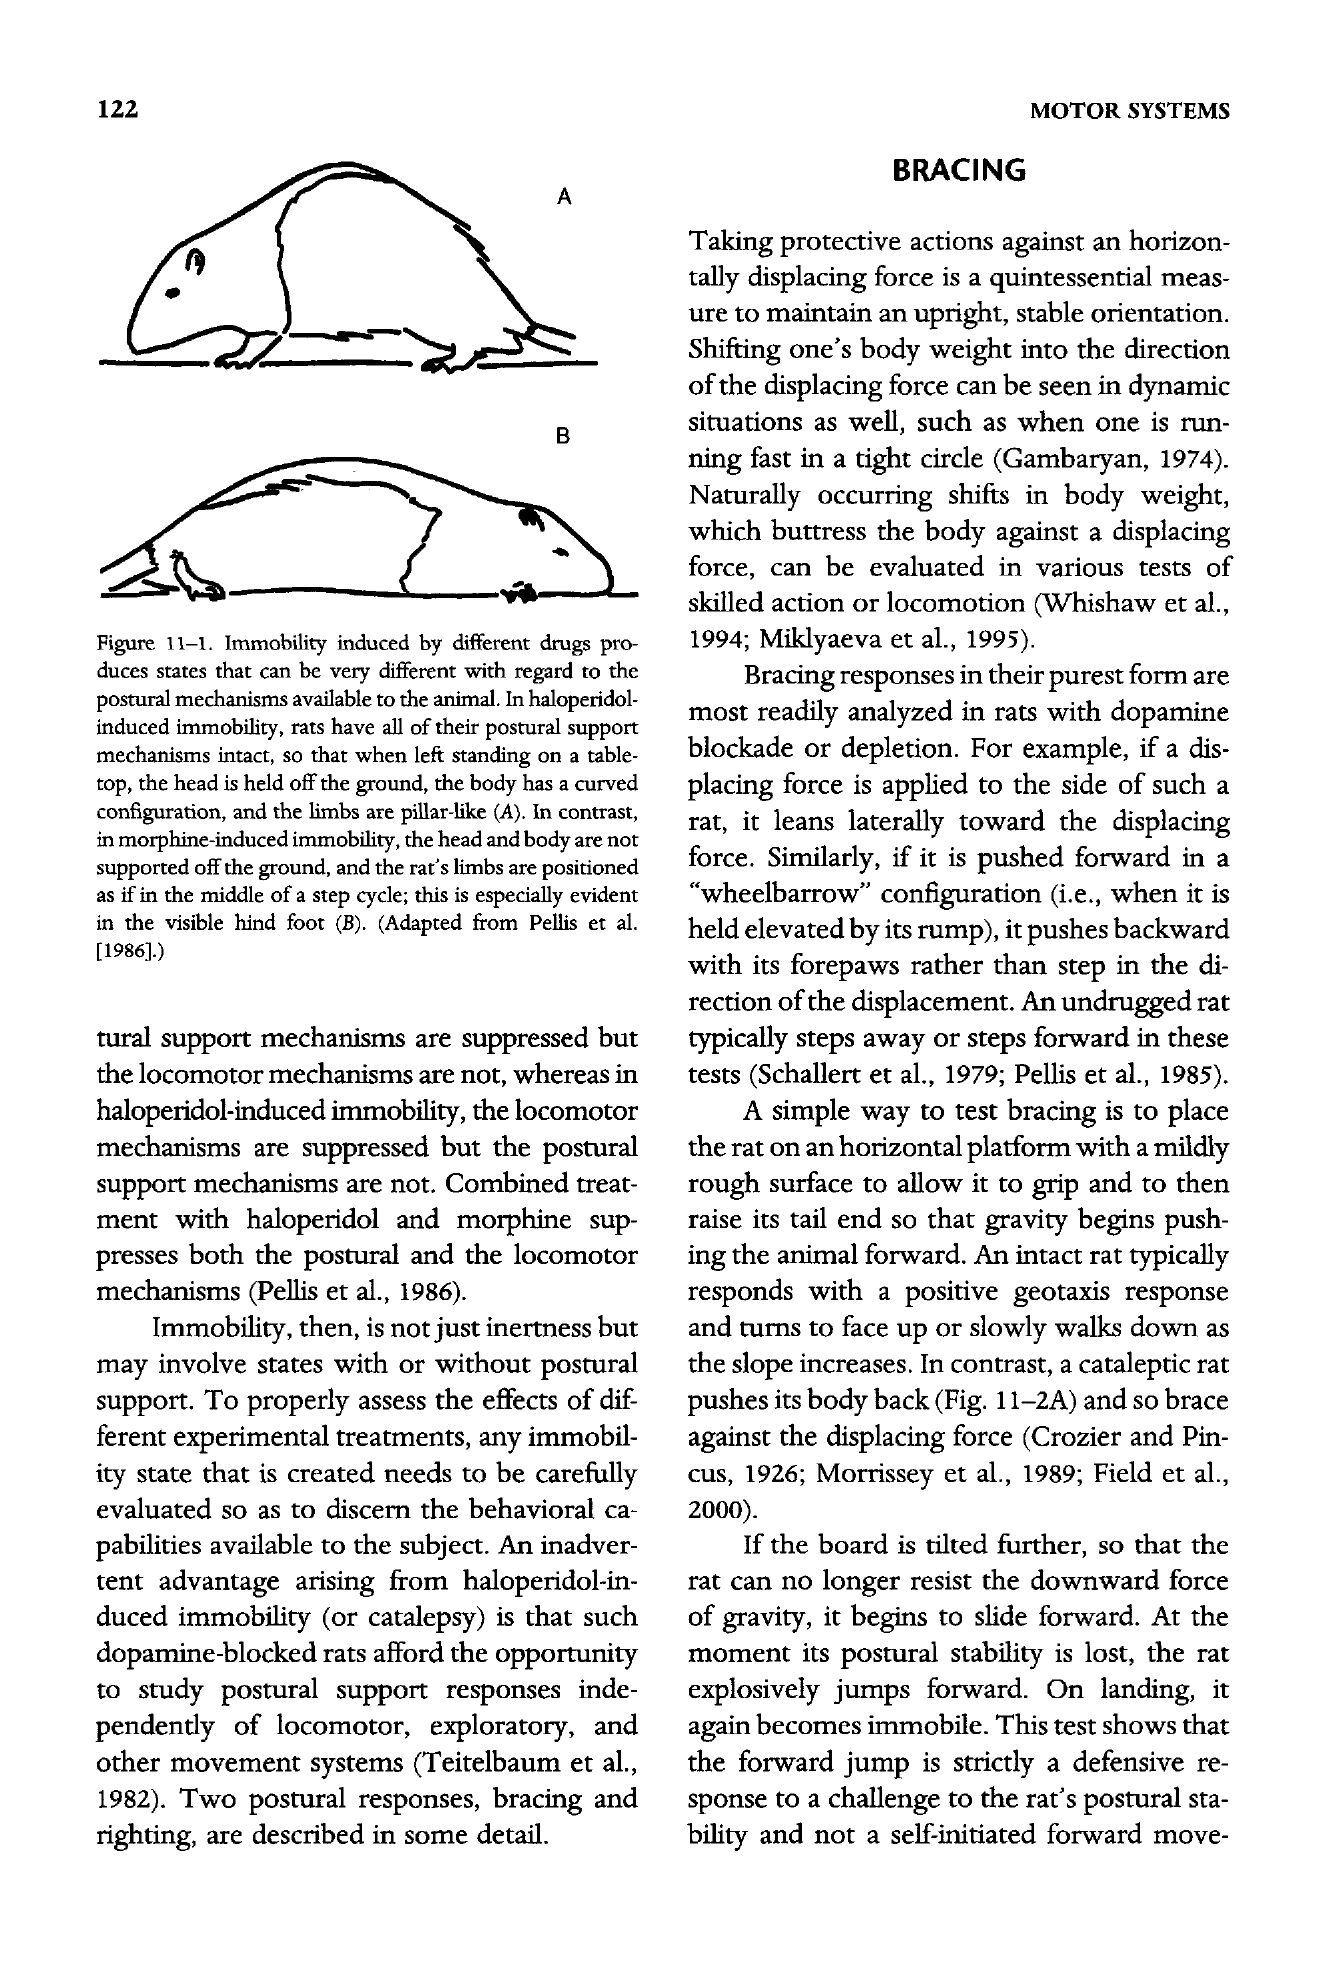

In [1]:
PAGE_INDEX = 139

from pdf2image import convert_from_path

pages = convert_from_path('data/rat.eng.pdf', 200, first_page=PAGE_INDEX, last_page=PAGE_INDEX+1)

page_image = pages[0]
page_image

In [22]:
# import io
# import tesserocr
# from PIL import Image
# api = tesserocr.PyTessBaseAPI()
# # image = Image.open(page_image)
# api.SetImage(page_image)
# api.Recognize()  # required to get result from the next line
# iterator = api.GetIterator()
# iterator
#     # print(iterator.WordFontAttributes())


from PIL import Image, ImageDraw
from tesserocr import PyTessBaseAPI, RIL, iterate_level, PSM

img = page_image

results = []
with PyTessBaseAPI() as api:
    api.SetImage(img)
    api.SetPageSegMode(PSM.AUTO_ONLY)
    iterator = api.AnalyseLayout()
    for w in iterate_level(iterator, RIL.BLOCK):
        if w is not None:
            results.append((w.BlockType(), w.BlockPolygon()))
print('Found {} block elements.'.format(len(results)))

draw = ImageDraw.Draw(img)
for block_type, poly in results:
    # you can define a color per block type (see tesserocr.PT for block types list)
    draw.line(poly + [poly[0]], fill=(0, 255, 0), width=2)

img


AttributeError: 'tesserocr.PyTessBaseAPI' object has no attribute 'end'

yon page with figure find text refering to the figure and text under the figure

find in the text surrounding text reffering to figure sentences related to the figure description text

In [34]:
!pip install "layoutparser[ocr]"
!pip install torchvision torch
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'



You should consider upgrading via the '/Users/standard/Lexicanium/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.2 MB 6.5 MB/s            
     |████████████████████████████████| 49.1 MB 27.8 MB/s            
You should consider upgrading via the '/Users/standard/Lexicanium/venv/bin/python -m pip install --upgrade pip' command.
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /private/var/folders/gf/k97vplfs0kq5rgx4cp5557sh0000gn/T/pip-install-rj59_cke/detectron2_bcad939393c24971ae2e39e31bee5b2d
  Running command git clone --filter=blob:none -q https://github.com/facebookresearch/detectron2.git /private/var/folders/gf/k97vplfs0kq5rgx4cp5557sh0000gn/T/pip-install-rj59_cke/detectron2_bcad939393c24971ae2e39e31bee5b2d
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Pr

In [28]:
!pip install opencv-python numpy pandas matplotlib

     |████████████████████████████████| 7.2 MB 4.4 MB/s            
     |████████████████████████████████| 63 kB 7.9 MB/s             
     |████████████████████████████████| 957 kB 14.0 MB/s            
You should consider upgrading via the '/Users/standard/Lexicanium/venv/bin/python -m pip install --upgrade pip' command.


/Users/standard/Lexicanium/venv/lib/python3.8/site-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/Users/standard/Lexicanium/venv/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


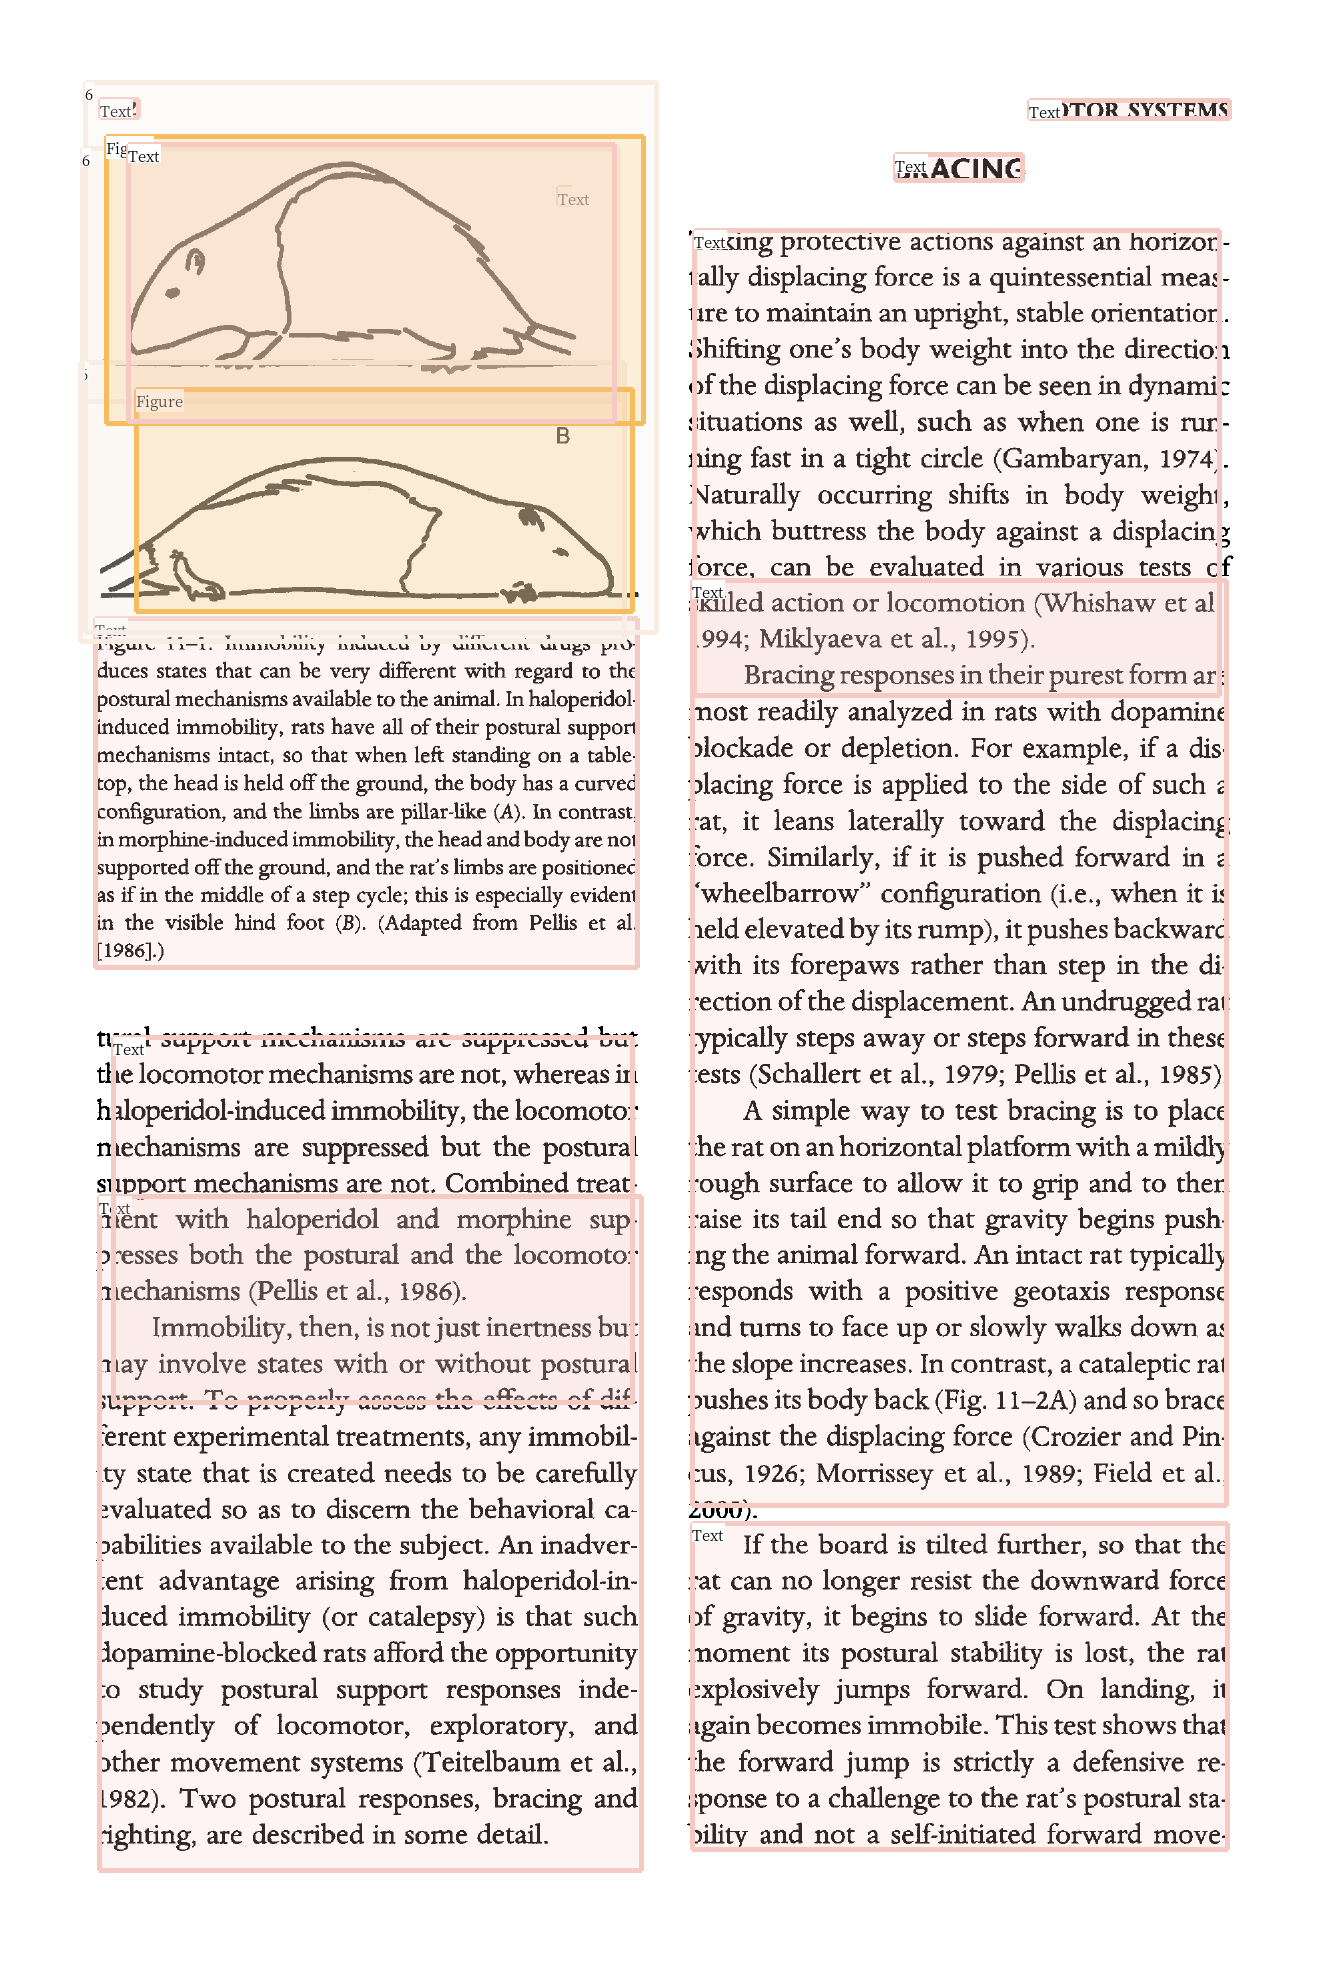

In [2]:
import layoutparser as lp
import cv2
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt

## load pre-trained model
# lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config')
model = lp.Detectron2LayoutModel(
    'lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
   # "lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
   #extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
   label_map={0:"Title", 1:"Text", 2:"Figure", 3:"Table", 4:"List"})
## turn img into array
i = 21
img = np.asarray(page_image)
## predict
detected = model.detect(img)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2,
            show_element_type=True)


In [3]:
## sort
new_detected = detected.sort(key=lambda x: x.coordinates[1])
## assign ids
detected = lp.Layout([block.set(id=idx) for idx,block in
                      enumerate(new_detected)])
## check
for block in detected:
    print("---", str(block.id)+":", block.type, "---")
    print(block, end='\n\n')

--- 0: 6 ---
TextBlock(block=Rectangle(x_1=85.6551513671875, y_1=82.17415618896484, x_2=656.8807983398438, y_2=632.853759765625), text=None, id=0, type=6, parent=None, next=None, score=0.9782625436782837)

--- 1: Text ---
TextBlock(block=Rectangle(x_1=100.4875259399414, y_1=99.32032012939453, x_2=138.19386291503906, y_2=117.5363540649414), text=None, id=1, type=Text, parent=None, next=None, score=0.9999334812164307)

--- 2: Text ---
TextBlock(block=Rectangle(x_1=1029.4495849609375, y_1=100.55952453613281, x_2=1229.6907958984375, y_2=118.63273620605469), text=None, id=2, type=Text, parent=None, next=None, score=0.999984622001648)

--- 3: Figure ---
TextBlock(block=Rectangle(x_1=106.33174896240234, y_1=136.3770294189453, x_2=643.0025024414062, y_2=423.2313537597656), text=None, id=3, type=Figure, parent=None, next=None, score=0.08501772582530975)

--- 4: Text ---
TextBlock(block=Rectangle(x_1=128.71763610839844, y_1=144.91148376464844, x_2=614.6777954101562, y_2=421.35137939453125), text

In [5]:
'''
{'0-Title': '...',
 '1-Text':  '...',
 '2-Figure': array([[ [0,0,0], ...]]),
 '3-Table': pd.DataFrame,
}
'''
def parse_doc(dic):
    for k,v in dic.items():
        if "Title" in k:
            print('\x1b[1;31m'+ v +'\x1b[0m')
        elif "Figure" in k:
            plt.figure(figsize=(10,5))
            plt.imshow(v)
            plt.show()
        else:
            print(v)
        print(" ")

# load model
model = lp.TesseractAgent(languages='eng')
dic_predicted = {}
for block in [block for block in detected if block.type in ["Title","Text"]]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5,
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = extracted.replace('\n',' ').strip()
# check
parse_doc(dic_predicted)


122
 
MOTOR SYSTEMS
 

 
BRACING
 

 
Taking protective actions against an horizon- tally displacing force is a quintessential meas- ure to maintain an upright, stable orientation. Shifting one’s body weight into the direction of the displacing force can be seen in dynamic situations as well, such as when one is run- ning fast in a tight circle (Gambaryan, 1974). Naturally occurring shifts in body weight, which buttress the body against a displacing force, can be evaluated in various tests of skilled action or locomotion (Whishaw et al., 1994; Miklyaeva et al., 1995).  Bracing responses in their purest form are
 
skilled action or locomotion (Whishaw et al., 1994; Miklyaeva et al., 1995).  Bracing responses in their purest form are most readily analyzed in rats with dopamine blockade or depletion. For example, if a dis- placing force is applied to the side of such a rat, it leans laterally toward the displacing force. Similarly, if it is pushed forward in a “wheelbarrow” configuration 

122
 
MOTOR SYSTEMS
 

 
BRACING
 

 
Taking protective actions against an horizon- tally displacing force is a quintessential meas- ure to maintain an upright, stable orientation. Shifting one’s body weight into the direction of the displacing force can be seen in dynamic situations as well, such as when one is run- ning fast in a tight circle (Gambaryan, 1974). Naturally occurring shifts in body weight, which buttress the body against a displacing force, can be evaluated in various tests of skilled action or locomotion (Whishaw et al., 1994; Miklyaeva et al., 1995).  Bracing responses in their purest form are
 
skilled action or locomotion (Whishaw et al., 1994; Miklyaeva et al., 1995).  Bracing responses in their purest form are most readily analyzed in rats with dopamine blockade or depletion. For example, if a dis- placing force is applied to the side of such a rat, it leans laterally toward the displacing force. Similarly, if it is pushed forward in a “wheelbarrow” configuration 

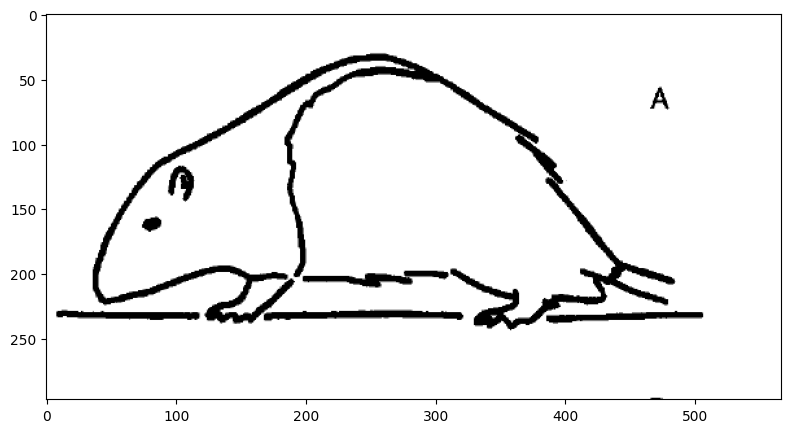

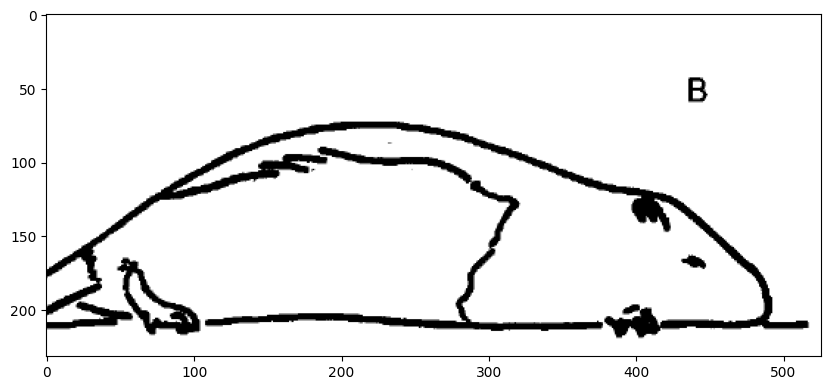

In [6]:
for block in [block for block in detected if block.type == "Figure"]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5,
                          bottom=5).crop_image(img)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = segmented
# check
parse_doc(dic_predicted)


122
 
MOTOR SYSTEMS
 

 
BRACING
 

 
Taking protective actions against an horizon- tally displacing force is a quintessential meas- ure to maintain an upright, stable orientation. Shifting one’s body weight into the direction of the displacing force can be seen in dynamic situations as well, such as when one is run- ning fast in a tight circle (Gambaryan, 1974). Naturally occurring shifts in body weight, which buttress the body against a displacing force, can be evaluated in various tests of skilled action or locomotion (Whishaw et al., 1994; Miklyaeva et al., 1995).  Bracing responses in their purest form are
 
skilled action or locomotion (Whishaw et al., 1994; Miklyaeva et al., 1995).  Bracing responses in their purest form are most readily analyzed in rats with dopamine blockade or depletion. For example, if a dis- placing force is applied to the side of such a rat, it leans laterally toward the displacing force. Similarly, if it is pushed forward in a “wheelbarrow” configuration 

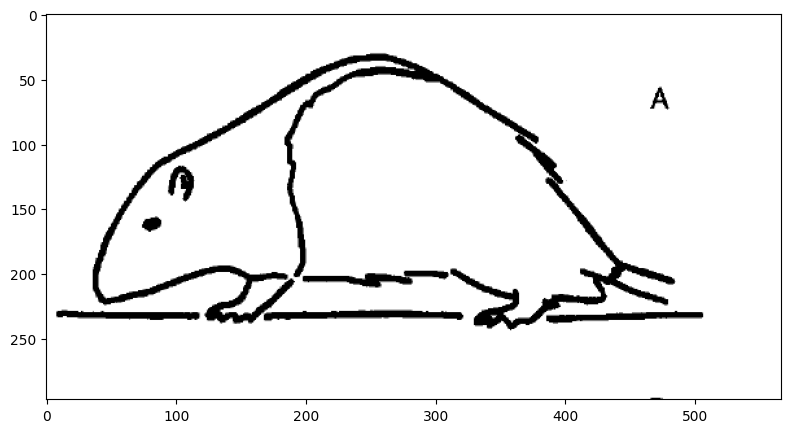

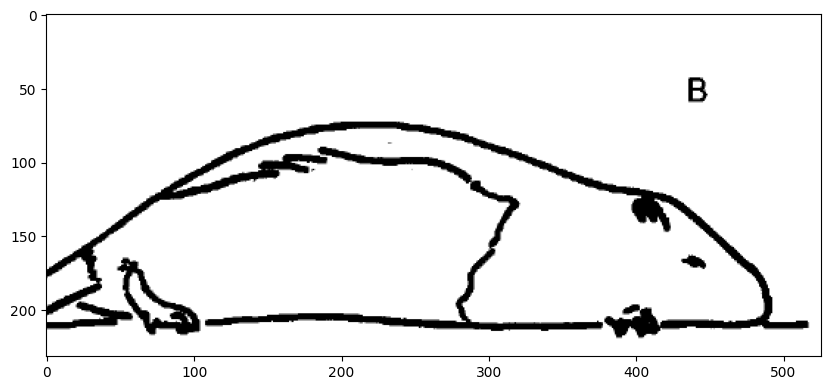

In [7]:
for block in [block for block in detected if block.type == "Table"]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5,
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = pd.read_csv(
                 io.StringIO(extracted) )
# check
parse_doc(dic_predicted)
